# Loading and preprocessing

In [4]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data =iris.data, columns = iris.feature_names)
print("Dataset after dropping target column")
print(df)

Dataset after dropping target column
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [16]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Clustering Algorithm implementation

# K means Custering
K means clustering is an unsupervised learning algorithm that groups data into a specific number of clusters(k) based on feature similarity. It is basically act by selecting k initial centroids, which is pretended to be the centre of the cluster. Each data points will be assigned to th nearest centroid based on Euclidian distance. 

K means clustering is suitable for iris data set because the data naturally forms distinct groups based on the measurement of flower features like petal,sepal length and width.

In [ ]:
# implementation and Visualization(K means clustering)

In [9]:
import matplotlib.pyplot as plt

In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans_labels = kmeans.fit_predict(df)

C:\Users\asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


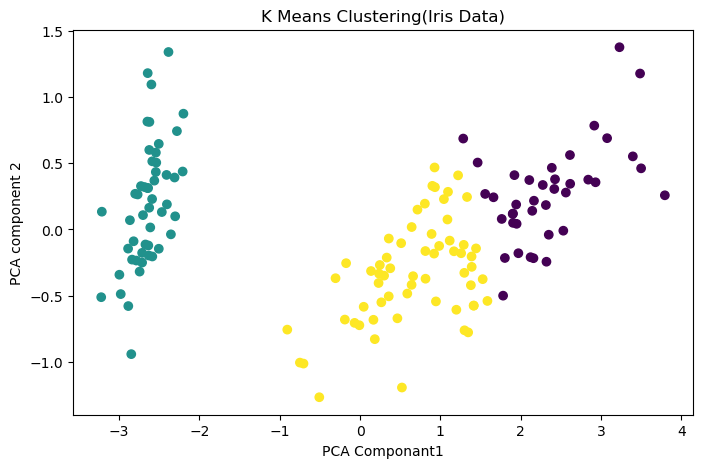

In [10]:
pca =  PCA(n_components = 2)
pca_data = pca.fit_transform(df)

plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=kmeans_labels, cmap = 'viridis')
plt.title("K Means Clustering(Iris Data)")
plt.xlabel("PCA Componant1")
plt.ylabel("PCA component 2")
plt.show()

# Hierarchical Clustering
Hierarchial clustering is an unsupervised learning method that builds a hierarchy of clusters by either merging/splitting them successively. The most common is agglomerative hierarchical clustering where each data points starts as its own cluster , and pairs of clusters are gradually merged based ontheir similarity or distance.

Iris dataset is small(150 raws and 4 columns), So hierarchical clustering is very feasible this datasel, it allows exploration of cluster hierarchy using dendrograms. It is good for understanding nested relationships between data points.

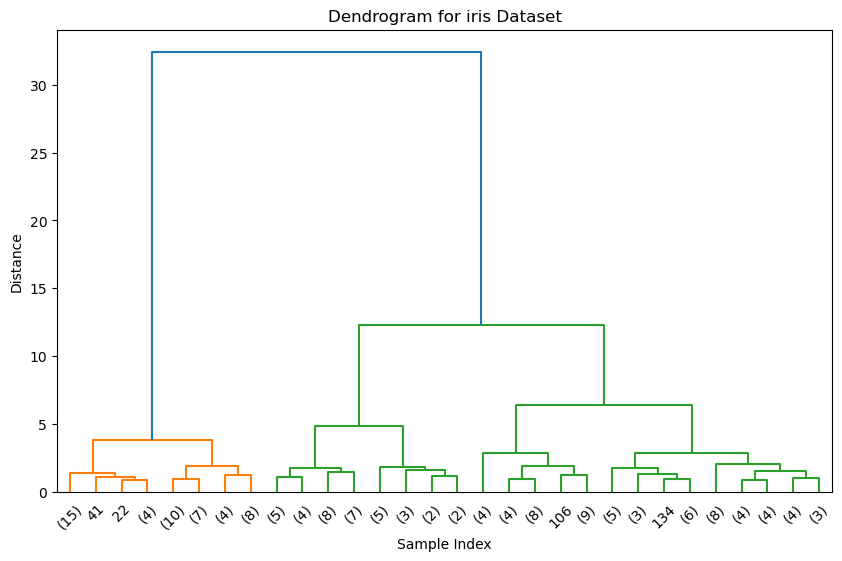

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

linked = linkage(df, method = 'ward')

plt.figure(figsize =  (10,6))
dendrogram(linked, truncate_mode = 'lastp', p = 30)
plt.title("Dendrogram for iris Dataset")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3)
hc_labels = hc.fit_predict(df)

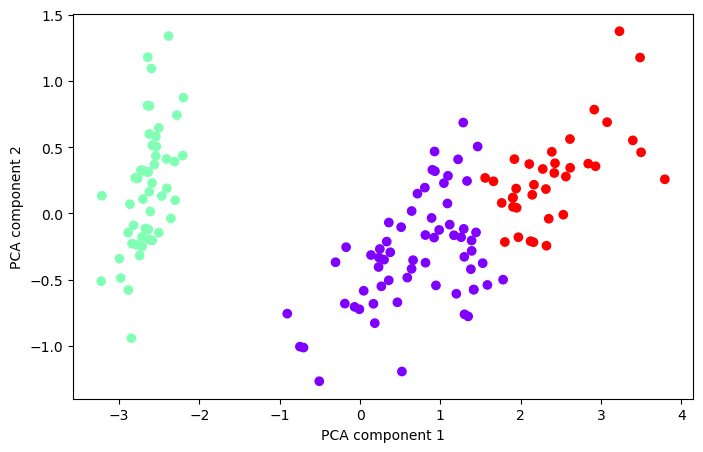

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(pca_data[:,0], pca_data[:,1], c=hc_labels, cmap = 'rainbow')
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.show()